# Tensorflow Linear Regression

*Course: Machine Learning Projects with TensorFlow 2.0 by Vlad Sebastian Ionescu*

## 1. Imports

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


## 2. Toy Data

In [4]:
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
n = 100
X = np.linspace(0, 50, n)
y = np.linspace(0, 50, n)

# Adding noise
X += np.random.uniform(-10, 10, n)
y += np.random.uniform(-10, 10, n)

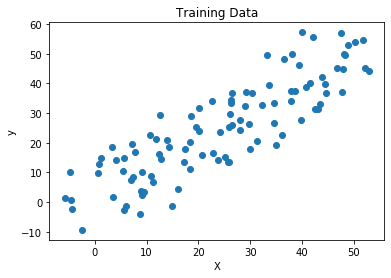

In [7]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training Data')
plt.show()

## 3. Linear Model Class

In [12]:
class LinearModel:
    def __init__(self):
        # Initiate weights
        # y = W*x + b
        self.W = tf.Variable(13.0)
        self.b = tf.Variable(4.0)
    
    def loss(self, y, y_pred):
        # Calculate MSE
        return tf.reduce_mean(tf.square(y - y_pred))
    
    def train(self, X, y, lr=0.0001, epochs=20, verbose=True):
        def train_step():
            with tf.GradientTape() as t: 
                # Calculate the loss
                current_loss = self.loss(y, self.predict(X))
            
            # Calculate the gradient and update the weights
            dW, db = t.gradient(current_loss, [self.W, self.b])
            self.W.assign_sub(lr * dW)
            self.W.assign_sub(lr * dW)
            
            return current_loss
        
        for epoch in range(epochs):
            current_loss = train_step 
            if verbose:
                print(f'Epoch {epoch}: Loss {current_loss()}')
                
    def predict(self, X):
        return self.W * X + self.b

## 4. Making Predictions

Epoch 0: Loss 124765.109375
Epoch 1: Loss 54609.3203125
Epoch 2: Loss 23923.705078125
Epoch 3: Loss 10502.0576171875
Epoch 4: Loss 4631.533203125
Epoch 5: Loss 2063.80859375
Epoch 6: Loss 940.7062377929688
Epoch 7: Loss 449.4696960449219
Epoch 8: Loss 234.6066436767578
Epoch 9: Loss 140.62713623046875
Epoch 10: Loss 99.52117919921875
Epoch 11: Loss 81.5417709350586
Epoch 12: Loss 73.67770385742188
Epoch 13: Loss 70.23802947998047
Epoch 14: Loss 68.7335433959961
Epoch 15: Loss 68.07548522949219
Epoch 16: Loss 67.78765869140625
Epoch 17: Loss 67.66175842285156
Epoch 18: Loss 67.60669708251953
Epoch 19: Loss 67.58261108398438


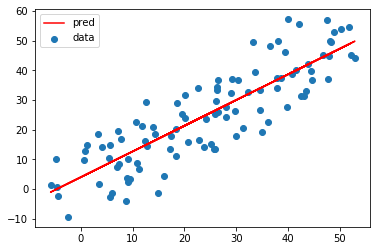

In [16]:
model = LinearModel()
model.train(X, y, epochs=20)
plt.scatter(X, y, label='data')
plt.plot(X, model.predict(X), 'r-', label='pred')
plt.legend()